In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
import os
import random
import numpy as np
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!unzip /content/drive/MyDrive/Datasets/archive.zip

Archive:  /content/drive/MyDrive/Datasets/archive.zip
  inflating: Skin_Data/Cancer/Testing/1714-02.jpg  
  inflating: Skin_Data/Cancer/Testing/1718-2.jpg  
  inflating: Skin_Data/Cancer/Testing/1777-1.JPG  
  inflating: Skin_Data/Cancer/Testing/1780.1.JPG  
  inflating: Skin_Data/Cancer/Testing/1780.JPG  
  inflating: Skin_Data/Cancer/Testing/1789-02.JPG  
  inflating: Skin_Data/Cancer/Testing/1811-3.JPG  
  inflating: Skin_Data/Cancer/Testing/1847 (7).JPG  
  inflating: Skin_Data/Cancer/Testing/1847.JPG  
  inflating: Skin_Data/Cancer/Testing/1861-02.JPG  
  inflating: Skin_Data/Cancer/Testing/1864-1.JPG  
  inflating: Skin_Data/Cancer/Testing/1877(2).JPG  
  inflating: Skin_Data/Cancer/Testing/1877.JPG  
  inflating: Skin_Data/Cancer/Testing/1905.JPG  
  inflating: Skin_Data/Cancer/Testing/1969-1.JPG  
  inflating: Skin_Data/Cancer/Testing/1969-2.JPG  
  inflating: Skin_Data/Cancer/Testing/1988-01.JPG  
  inflating: Skin_Data/Cancer/Testing/1991 (1).JPG  
  inflating: Skin_Data/Canc

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import os
import random
import numpy as np
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

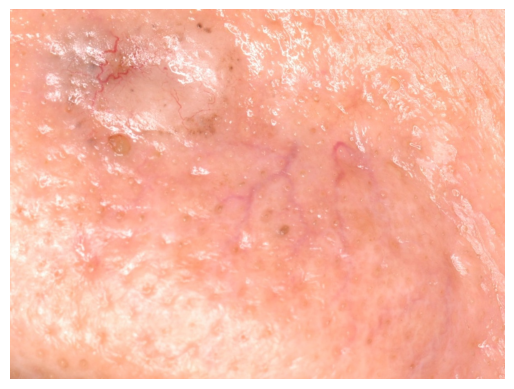

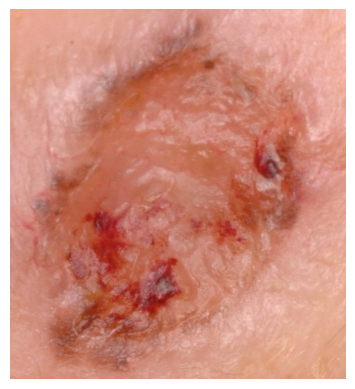

In [9]:
import os
import matplotlib.pyplot as plt
from PIL import Image

image_directory = "/content/Skin_Data/Cancer/Testing"
image_files = [f for f in os.listdir(image_directory) if f.endswith((".jpg", ".png", ".jpeg"))]

if not image_files:
    print("No image files found in the directory.")
else:
    num_images_to_display = 5
    for i in range(min(num_images_to_display, len(image_files))):
        image_path = os.path.join(image_directory, image_files[i])
        image = Image.open(image_path)

        plt.imshow(image)
        plt.axis('off')
        plt.show()

In [10]:
cancer_train = '/content/Skin_Data/Cancer/Training'
non_cancer_train = '/content/Skin_Data/Non_Cancer/Training'

cancer_test = '/content/Skin_Data/Cancer/Testing'
non_cancer_test = '/content/Skin_Data/Non_Cancer/Testing'

In [11]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

cancer_images = load_images_from_folder(cancer_train)
non_cancer_images = load_images_from_folder(non_cancer_train)

In [12]:
len(cancer_images)

42

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [14]:
len(non_cancer_images)

42

In [15]:
# Load and preprocess images from both directories, including data augmentation
def load_and_preprocess_images_from_folder(folder, target_size=(224, 224), augment=False, batch_size=32):
    images = []
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
    ) if augment else None

    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            if augment:
                img = np.array(img)
                img = img / 255.0  # Normalize pixel values to [0, 1]
                img = img.reshape((1,) + img.shape)
                for batch in datagen.flow(img, batch_size=batch_size):
                    augmented_images = batch
                    images.extend(augmented_images)
            img = img.resize(target_size)
            img = np.array(img)  # Convert PIL image to a NumPy array
            img = img / 255.0  # Normalize pixel values to [0, 1]
            images.append(img)
    return images

In [16]:
import concurrent.futures
# Function to load and preprocess a single image
def load_and_preprocess_image(file_path, target_size=(224, 224,), augment=False):
    img = Image.open(file_path)
    if img is not None:
        if augment:
            # Apply data augmentation to the image here if needed
            pass
        img = img.resize(target_size)  # Resize images to a consistent size
        img = np.array(img)  # Convert PIL image to a NumPy array
        img = img / 255.0  # Normalize pixel values to [0, 1]
        return img

# Load and preprocess images from a directory in parallel
def load_and_preprocess_images_from_folder_parallel(folder, target_size=(224, 224), augment=False):
    images = []
    file_paths = [os.path.join(folder, filename) for filename in os.listdir(folder)]

    with concurrent.futures.ThreadPoolExecutor() as executor:
        for img in executor.map(lambda path: load_and_preprocess_image(path, target_size, augment), file_paths):
            if img is not None:
                images.append(img)

    return images

# Load and preprocess cancer and non-cancer images with data augmentation in parallel
cancer_images = load_and_preprocess_images_from_folder_parallel(cancer_train, augment=True)
non_cancer_images = load_and_preprocess_images_from_folder_parallel(non_cancer_train, augment=True)

# Define labels for the images (1 for cancer, 0 for non-cancer)
cancer_labels = ['Cancer'] * len(cancer_images)
non_cancer_labels = ['Non Cancer'] * len(non_cancer_images)

# Combine images and labels
images = np.array(cancer_images + non_cancer_images)
labels = np.array(cancer_labels + non_cancer_labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Now, X_train, y_train are ready for training and X_val, y_val are ready for validation

In [17]:
X_val.shape

(17, 224, 224, 3)

In [18]:
X_train.shape

(67, 224, 224, 3)

In [19]:
y_train.shape

(67,)

In [20]:
y_val.shape

(17,)

In [23]:
import concurrent.futures
from tensorflow.keras import Model

# Assuming you have already defined the functions and loaded the images

# Load and preprocess cancer and non-cancer images with data augmentation in parallel
cancer_images = load_and_preprocess_images_from_folder_parallel(cancer_train, augment=True)
non_cancer_images = load_and_preprocess_images_from_folder_parallel(non_cancer_train, augment=True)

# Define labels for the images (0 for cancer, 1 for non-cancer)
cancer_labels = [0] * len(cancer_images)
non_cancer_labels = [1] * len(non_cancer_images)

# Combine images and labels
images = np.array(cancer_images + non_cancer_images)
labels = np.array(cancer_labels + non_cancer_labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Now, X_train, y_train are ready for training and X_val, y_val are ready for validation

# Define a function to convert model outputs to labels
def convert_output_to_labels(outputs):
    return ["Cancer" if output == 0 else "Non Cancer" for output in outputs]

# Assuming you have trained a model called 'model'...

# Get predictions from the model

predictions = model.predict(X_val)

# Convert model outputs to labels
predicted_labels = convert_output_to_labels(np.argmax(predictions, axis=1))

# Print the predicted labels
print(predicted_labels)


1/1 [==============================] - 0s 34ms/step
['Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer']


In [22]:
import tensorflow as tf
from tensorflow import keras

# Load your data and perform any necessary data preprocessing here

# Create a more complex ANN model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(224, 224, 3)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),  # Add dropout to reduce overfitting
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with a different optimizer and learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # You can experiment with the learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
callbacks = [early_stopping]

# Train the model with a larger number of epochs
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=callbacks)

# Evaluate the model on the validation data
validation_loss, validation_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")

# Make predictions with the model
predictions = model.predict(X_val)

model.summary()


Epoch 1/50
2/2 [==============================] - 8s 245ms/step - loss: 3.7568 - accuracy: 0.4627 - val_loss: 8.5422 - val_accuracy: 0.4706
Epoch 2/50
2/2 [==============================] - 0s 56ms/step - loss: 21.0705 - accuracy: 0.5373 - val_loss: 15.1377 - val_accuracy: 0.5294
Epoch 3/50
2/2 [==============================] - 0s 54ms/step - loss: 30.7926 - accuracy: 0.5075 - val_loss: 3.3866 - val_accuracy: 0.4706
Epoch 4/50
2/2 [==============================] - 0s 53ms/step - loss: 33.2519 - accuracy: 0.5224 - val_loss: 6.4008 - val_accuracy: 0.4706
Epoch 5/50
2/2 [==============================] - 0s 60ms/step - loss: 28.6673 - accuracy: 0.4478 - val_loss: 2.6792 - val_accuracy: 0.4706
Epoch 6/50
2/2 [==============================] - 0s 52ms/step - loss: 20.1222 - accuracy: 0.5672 - val_loss: 8.4759 - val_accuracy: 0.5294
Epoch 7/50
2/2 [==============================] - 0s 56ms/step - loss: 27.8065 - accuracy: 0.5672 - val_loss: 17.9512 - val_accuracy: 0.5294
Epoch 8/50
2/2 [==

In [24]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 34.4 MB/s eta 0:00:00


In [25]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

# Define a function to build the CNN model with hyperparameters
def build_model(hp):
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(128, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    # Define a hyperparameter for the choice of optimizer
    optimizer_choice = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])

    # Define a learning rate hyperparameter
    lr_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=lr_rate)
    elif optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=lr_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=lr_rate)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Implement data augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Load and preprocess your data (X_train, y_train, X_val, y_val) here.

# Initialize the Keras Tuner RandomSearch
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,  # Adjust the number of trials as needed
    directory='my_directory'  # Specify a directory for saving results
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

# Get the best hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# Fit the best model using data augmentation
datagen.fit(X_train)
best_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_val, y_val))

# Evaluate the best model on the validation set
accuracy = best_model.evaluate(X_val, y_val)[1]
print(f'Validation accuracy: {accuracy * 100:.2f}%')

# Print the best model's summary to see the architecture
best_model.summary()


Trial 3 Complete [00h 00m 16s]
val_accuracy: 0.8235294222831726

Best val_accuracy So Far: 0.8235294222831726
Total elapsed time: 00h 00m 57s
Epoch 1/50
3/3 [==============================] - 4s 139ms/step - loss: 0.9021 - accuracy: 0.4478 - val_loss: 0.7005 - val_accuracy: 0.5294
Epoch 2/50
3/3 [==============================] - 1s 384ms/step - loss: 0.7219 - accuracy: 0.4925 - val_loss: 0.7187 - val_accuracy: 0.5294
Epoch 3/50
3/3 [==============================] - 1s 205ms/step - loss: 0.7163 - accuracy: 0.4925 - val_loss: 0.6967 - val_accuracy: 0.5294
Epoch 4/50
3/3 [==============================] - 1s 204ms/step - loss: 0.6989 - accuracy: 0.4925 - val_loss: 0.6912 - val_accuracy: 0.5294
Epoch 5/50
3/3 [==============================] - 1s 392ms/step - loss: 0.6909 - accuracy: 0.5821 - val_loss: 0.6919 - val_accuracy: 0.4706
Epoch 6/50
3/3 [==============================] - 1s 199ms/step - loss: 0.6947 - accuracy: 0.5075 - val_loss: 0.6926 - val_accuracy: 0.4706
Epoch 7/50
3/3 [==

In [26]:
# Save the model weights only
model.save_weights('my_model_weights.h5')

In [30]:
# Given code with integrated image loading and necessary adjustments

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization, Conv2D, MaxPooling2D, Flatten, TimeDistributed
from sklearn.model_selection import train_test_split
from tensorflow import keras
import kerastuner as kt
import tensorflow as tf

# Function to load images from a directory and assign a label
def load_images_from_directory_with_pil(directory_path, label):
    images_list = []
    labels_list = []

    # List all files in the directory
    for filename in os.listdir(directory_path):
        # Load the image and resize to 224x224
        img_path = os.path.join(directory_path, filename)
        img = Image.open(img_path).resize((224, 224))
        img_array = np.array(img)
        images_list.append(img_array)
        labels_list.append(label)

    return images_list, labels_list

# Load "Cancer" and "Non_Cancer" training images
cancer_images, cancer_labels = load_images_from_directory_with_pil(cancer_train, 1)
non_cancer_images, non_cancer_labels = load_images_from_directory_with_pil(non_cancer_train, 0)

# Combine the images and labels
image = np.array(cancer_images + non_cancer_images)
labels = np.array(cancer_labels + non_cancer_labels)

# Create a Sequential model
model2 = Sequential()

# Add an LSTM layer
num_classes = 10  # This might not be applicable since the final layer uses sigmoid
model2.add(LSTM(units=32, return_sequences=True))
model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(num_classes, activation='softmax'))

# Define a function to build the combined CNN-LSTM model with hyperparameters
def build_model(hp):
    model = keras.Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        TimeDistributed(Flatten()),  # Apply Flatten to each time step
        LSTM(hp.Int('lstm_units', min_value=32, max_value=128, step=32)),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Initialize the Keras Tuner RandomSearch
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Adjust the number of trials as needed
    directory='my_directory'  # Specify a directory for saving results
)

# Search for the best hyperparameters
X_train, X_val, y_train, y_val = train_test_split(image, labels, test_size=0.2, random_state=42)
tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

# Get the best hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# Fit the best model using data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)  # Define data augmentation if needed
datagen.fit(X_train)
best_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_val, y_val))

# Evaluate the best model on the validation set
accuracy = best_model.evaluate(X_val, y_val)[1]
print(f'Validation accuracy: {accuracy * 100:.2f}%')

# Print the best model's summary to see the architecture
best_model.summary()


Trial 5 Complete [00h 00m 11s]
val_accuracy: 0.529411792755127

Best val_accuracy So Far: 0.8235294222831726
Total elapsed time: 00h 24m 39s
Epoch 1/50
3/3 [==============================] - 4s 306ms/step - loss: 0.7134 - accuracy: 0.4776 - val_loss: 0.6922 - val_accuracy: 0.5294
Epoch 2/50
3/3 [==============================] - 0s 93ms/step - loss: 0.6913 - accuracy: 0.4925 - val_loss: 0.6973 - val_accuracy: 0.4706
Epoch 3/50
3/3 [==============================] - 0s 84ms/step - loss: 0.6889 - accuracy: 0.5075 - val_loss: 0.6612 - val_accuracy: 0.7059
Epoch 4/50
3/3 [==============================] - 0s 47ms/step - loss: 0.6844 - accuracy: 0.5672 - val_loss: 0.6872 - val_accuracy: 0.5294
Epoch 5/50
3/3 [==============================] - 0s 83ms/step - loss: 0.6945 - accuracy: 0.5075 - val_loss: 0.7285 - val_accuracy: 0.4706
Epoch 6/50
3/3 [==============================] - 0s 75ms/step - loss: 0.7146 - accuracy: 0.5075 - val_loss: 0.7542 - val_accuracy: 0.4706
Epoch 7/50
3/3 [========

In [32]:
import tensorflow as tf
from tensorflow import keras
from kerastuner import RandomSearch

# Define the hyperparameter space
hyperparameters = {
    'lstm_units': [32, 64, 128],
    'learning_rate': [0.001, 0.005, 0.01],
}

# Initialize the Keras Tuner RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    directory='my_directory'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

# Get the best hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# Fit the best model using data augmentation
datagen.fit(X_train)
best_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_val, y_val))

# Evaluate the best model on the validation set
accuracy = best_model.evaluate(X_val, y_val)[1]
print(f'Validation accuracy: {accuracy * 100:.2f}%')

# Print the best model's summary to see the architecture
best_model.summary()


Reloading Tuner from my_directory/untitled_project/tuner0.json
Epoch 1/50
3/3 [==============================] - 3s 305ms/step - loss: 0.7532 - accuracy: 0.4328 - val_loss: 0.7217 - val_accuracy: 0.4706
Epoch 2/50
3/3 [==============================] - 0s 91ms/step - loss: 0.7013 - accuracy: 0.5075 - val_loss: 0.6980 - val_accuracy: 0.4706
Epoch 3/50
3/3 [==============================] - 0s 49ms/step - loss: 0.6947 - accuracy: 0.5075 - val_loss: 0.6933 - val_accuracy: 0.4706
Epoch 4/50
3/3 [==============================] - 0s 49ms/step - loss: 0.6921 - accuracy: 0.4925 - val_loss: 0.6945 - val_accuracy: 0.5294
Epoch 5/50
3/3 [==============================] - 0s 58ms/step - loss: 0.6960 - accuracy: 0.4925 - val_loss: 0.6957 - val_accuracy: 0.5294
Epoch 6/50
3/3 [==============================] - 0s 90ms/step - loss: 0.6956 - accuracy: 0.4925 - val_loss: 0.6992 - val_accuracy: 0.5294
Epoch 7/50
3/3 [==============================] - 0s 54ms/step - loss: 0.6967 - accuracy: 0.4925 - val

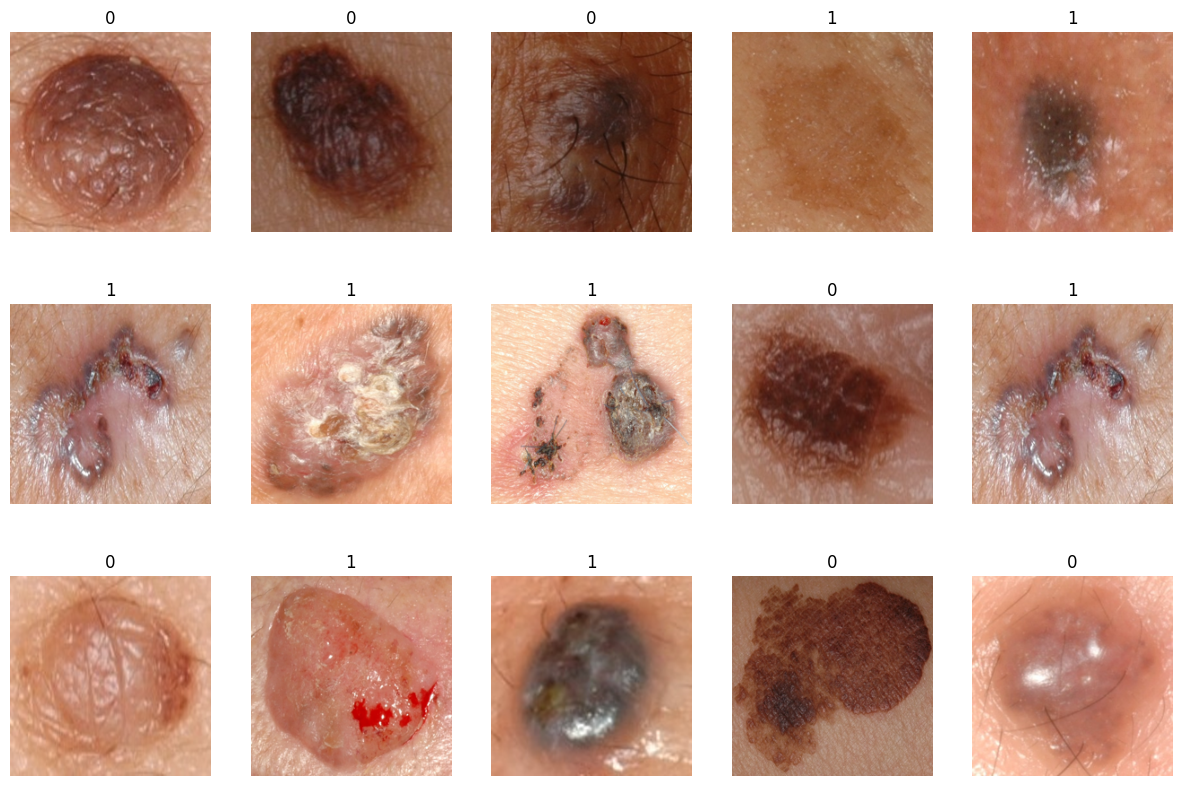

In [33]:
def display_images(images, labels, num_images=5, num_cols=5):
    num_rows = (num_images + num_cols - 1) // num_cols
    plt.figure(figsize=(15, 10))
    for i in range(min(num_images, len(images))):  # Adjusted this line
        ax = plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis("off")
display_images(X_train, y_train, num_images=15, num_cols=5)